# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [1]:
# matplotlib -> gráfico
# seaborn -> grafico
# scikit-lean -> inteligencia artificial

!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
import pandas as pd

tabela = pd.read_csv('advertising.csv')
display(tabela) # vendas tá em milhão e TV/Radio/Jornal tá em milhares
# a base de dados já está tratada -> já aprendemos isso na aula passada

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

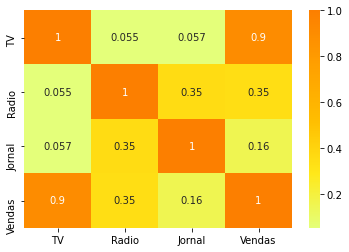

In [5]:
# queremos conseguir prever as vendas -> precisamos entender como os investimentos em TV/Radio/Jornal afetam as vendas
# Para fazer isso a gente calcula essa correlação

# CORRELAÇÃO: é um número que vai de 0 a 1 (mais relacionado -> mais próximo de um | menos relacionado -> mais próximo de 0)
# Exemplo: quando um sobe, o outro sobe na mesma proporção 
# Exemplo 1          Exemplo 2          Exemplo 3
# Vendas  TV      |    Vendas   Tv   |  Vendas   TV
#   10     1      |     10       2   |    10     2
#   20     2      |     20       4   |    20     5
#   30     3      |     30       6   |    30     6
# Corr: 1   | Corr: 1    | Corr: 0.9

# Seguindo essa lógica, vamos ver as correlações presentes na tabela

import seaborn as sns # sms é outra convenção para o seaborn -> cria gráfico e é mais tranquilo para mexer no gráfico do que o plt
import matplotlib.pyplot as plt # plt é outra convenção para o matplotlib -> seaborn foi feito como matplotlib

# cria o gráfico
sns.heatmap(tabela.corr(), cmap='Wistia', annot = True) # wistia é o parâmetro de cor -> no site do seaborn vc pode encontrar outras
                                                        # o parâmtro annot permite visualizar o número diretamente no quadradinho
# exibe o gráfico
plt.show() # Agora, observando o gráfico, já temos a nossa correlação e fizemos a nossa análise exploratória


#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [7]:
# em termos de código essa parte é bem rápida, mas precisamos entender
# vamos treinar a nossa IA
# aprendia com questões/simulados --
# fazia a prova --------------------| ----> assim que a IA funciona

# vamos pegar a base de dados, e dividir ela em dados de teste e dados de treino. a maior parte é de dados de treino e uma menor parte é para test
# selecionar os dados de x e os dados de y
# x -> o resto (quem vc vai usar para fazer a previsão) → TV / RADIO / JORNAL
# y -> quem vc quer prever → VENDAS

y = tabela['Vendas']
x = tabela[['TV', 'Radio', 'Jornal']] # mais de uma coluna -> dois colchetes        uma coluna -> um colchete

# para dividir entre treinos e testes é meio arbitrário
# normalmente fica 70% para treino e 30% para teste -> o que é certo é que vai ter mais treino do que teste
# caso esses dados não deêm muito certo, a gente precisa mudar essa divisão
# para fazer essa separação de treino e teste, usamos scikit-learn

from sklearn.model_selection import train_test_split # o train_test_split faz essa divisão entre treino e teste

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1) # é sempre nessa ordem que o scikit-learn devolve
# Então eu passei o meu x e o meu y para train_test_split() e ele vai me devolver essas quatro coisas acima nessa ordem
# 20% test 80% train -> esse é o padrão do scikit-learn, mas dá para eu mudar adicionando o parâmetro test_size, que é o tanto que eu quero colocar para teste
# o parâmetro random_state é para embaralhar de forma fixa, para ficar igual o do Lira
display(x_treino)
display(x_teste)
display(y_treino)
display(y_teste)

,TV,Radio,Jornal
116,139.2,14.3,25.6
117,76.4,0.8,14.8
90,134.3,4.9,9.3
19,147.3,23.9,19.1
48,227.2,15.8,49.9
...,...,...,...
153,171.3,39.7,37.7
140,73.4,17.0,12.9
132,8.4,27.2,2.1
36,266.9,43.8,5.0


,TV,Radio,Jornal
77,120.5,28.5,14.2
178,276.7,2.3,23.7
83,68.4,44.5,35.6
17,281.4,39.6,55.8
54,262.7,28.8,15.9
87,110.7,40.6,63.2
21,237.4,5.1,23.5
148,38.0,40.3,11.9
94,107.4,14.0,10.9
12,23.8,35.1,65.9


116    12.2
117     9.4
90     14.0
19     14.6
48     19.8
       ... 
153    16.0
140    10.9
132     5.7
36     25.4
41     17.1
Name: Vendas, Length: 140, dtype: float64

77     14.2
178    16.8
83     13.6
17     24.4
54     20.2
87     16.0
21     17.5
148    10.9
94     11.5
12      9.2
183    26.2
194    17.3
93     22.2
141    19.2
20     18.0
126     6.6
76      6.9
129     9.7
192     5.9
98     25.4
107    12.0
161    13.3
46     10.6
177    16.7
142    20.1
89     16.7
195     7.6
182     8.7
70     18.3
9      15.6
128    24.7
169    20.0
58     23.8
102    19.8
185    22.6
121     7.0
111    21.8
122    16.6
31     11.9
164    11.9
160    16.4
198    25.5
144    12.3
130     1.6
14     19.0
162    19.9
26     15.0
84     21.7
125    10.6
135    11.6
110    18.4
100    16.7
149    10.1
134    10.8
3      16.5
74     17.0
120    15.5
95     16.9
112    17.1
189     6.7
Name: Vendas, dtype: float64

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [22]:
# Criar a IA é meio frustrante :( kskskks pq basta só usar uma biblioteca e ir testando
# Vamos criar duas IAs, compará-las e ver qual se enquadra melhor para o que a gente quer
# vamos fazer o de regressão linear e o de random forest

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#criar os modelos
# O QUE ESSES DOIS MODELOS FAZEM?
# O de regressão linear põe as informações no gráfico e traça uma reta para ficar mais próximo da distribuição dos dados plotados no gráfico
# árvore de decisão: Vai fazendo várias perguntas e ramificando as respostas em SIM ou NÃO -> procura o valor de rádio de busca o mais próximo desse valor
modelo_regressaolinear = LinearRegression()
modelo_arvorededecisao = RandomForestRegressor()

# treinar os modelos
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvorededecisao.fit(x_treino, y_treino)
# Esse treino é sempre necessário. Assim que o youtube, o google ... recomendam anúncios por exemplo
# é aqui que a gente vai saber se o tamanho da base de dados está bom, se a divisão de treino e teste está boa...

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [10]:
# vou dar o x de teste para os meus modelos fazerem previsões e vou comparar as previsões com o meu y de teste
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvorededecisao = modelo_arvorededecisao.predict(x_teste)

from sklearn import metrics

print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvorededecisao))

0.9259530606054605
0.9613517992176003


#### Visualização Gráfica das Previsões

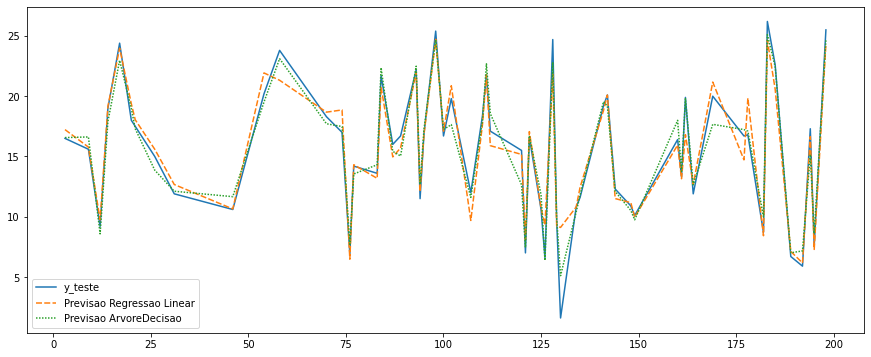

In [25]:
# árvore de decisão é o melhor modelo. Vamos usar ele para fazer as nossas previsões
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsao Regressao Linear'] = previsao_regressaolinear
tabela_auxiliar['Previsao ArvoreDecisao'] = previsao_arvorededecisao

plt.figure(figsize=(15,6))
sns.lineplot(data = tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [14]:
# Vamo usar o nosso modelo para fazer outra previsão
# importar a novas informações com as novas infromações que vc quer prever
nova_tabela = pd.read_csv('novos.csv')
display(nova_tabela)

# usar o modelo_arvorededecisao e fazer um .predict com ele
previsao = modelo_arvorededecisao.predict(nova_tabela)
print(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.504  9.112 20.558]
